In [2]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import math
from random import random
import statistics
%matplotlib inline

### Achiral Particles 

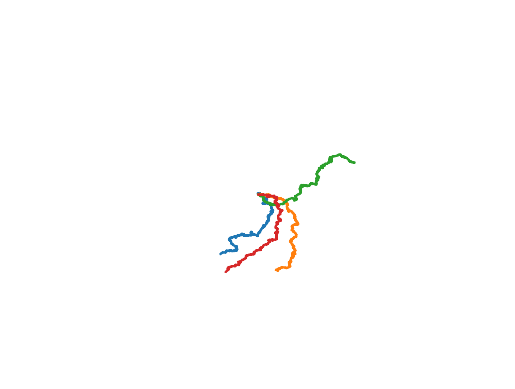

In [3]:
#Finite Difference Method
#Figure 1 (c) to (f)
#Non Chiral Particles - [omega = 0]

kB = 1.38*(10**(-23))                           #Boltzmann constant [J/K] 
T = 300                                         #Temperature [K]
eta = 0.001                                     #Fluid Viscosity [N s/m^2]
R = 1 *10**(-6)                                 #Radius of the particle [m]
DT = (kB*T)/(6*(math.pi)*eta*R)                   #Translational Diffusion Coefficient [m^2/s]
DR = (kB*T)/(8*(math.pi)*eta*R**(3))              #Rotational Diffusion Coefficient [rad^2/s]
omega = 0                                       #angular velocity [rad/sec]
v = 3*10**(-6)                                  #speed [m/s] 
#Specifying the value of 'v' as 0, 1, 2 and 3 μm/s will yield figures 1-(c) to (f) respectively

t0 = 1
tf = 10
dt = 0.01
t = np.arange(t0,tf,dt)
n = int((tf-t0)/dt)



for j in range(4):
    
    theta = []
    x = []
    y = []
    theta0 = 0
    x0 = 0
    y0 = 0
    for i in range(n):
        temp_theta = theta0 + omega *dt + math.sqrt(2 * DR * dt)*np.random.randn()
        temp_x = x0 + v*math.cos(theta0)*dt + math.sqrt(2 * DT * dt)*np.random.randn()
        temp_y = y0 + v*math.sin(theta0)*dt + math.sqrt(2 * DT * dt)*np.random.randn()
    
        theta.append(temp_theta)
        x.append(temp_x)
        y.append(temp_y)
    
        theta0 = temp_theta
        x0 = temp_x
        y0 = temp_y
        
    plt.plot(x,y)

plt.xlim([-0.00005,0.00005])
plt.ylim([-0.00005,0.00005])
plt.axis('off')
plt.show()   



### Run and Tumble Particles

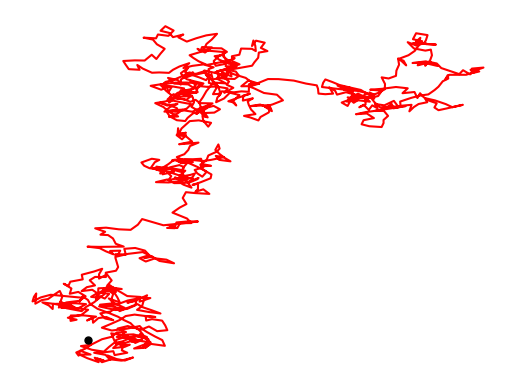

In [5]:
kB = 1.38*(10**(-23))                           #Boltzmann constant [J/K] 
T = 300                                         #Temperature [K]
eta = 0.001                                     #Fluid Viscosity [N s/m^2]
R = 1 *10**(-6)                                 #Radius of the particle [m]
DT = (kB*T)/(6*np.pi*eta*R)                   #Translational Diffusion Coefficient [m^2/s]
DR = (kB*T)/(8*np.pi*eta*R**(3))              #Rotational Diffusion Coefficient [rad^2/s]
omega = -3.14                                       #angular velocity [rad/sec]
#Specifying the values of omega as +3.14 and -3.14 will yield figures 1-(g) and (h)
v = 31*10**(-6)                                  #speed [m/s] 

t0 = -5
tf = 5
dt = 0.01
t = np.arange(t0,tf,dt)
n = int((tf-t0)/dt)

Theta0 = np.pi # characteristic angle
lambda_t = 0.8  # poisson 

theta0 = 0
x0 = 0
y0 = 0

theta = []
x = []
y = []

for i in range(n):
        ran = np.random.uniform(0, 1)
        if ran <= lambda_t:
                pn = 0
        else: 
                pn = 1
        Theta = Theta0 * np.random.uniform(-1, 1)
        temp_theta = theta0 + (1 - pn) * Theta
        temp_x = x0 + v*math.cos(theta0)*dt + math.sqrt(2 * DT * dt)*np.random.randn()
        temp_y = y0 + v*math.sin(theta0)*dt + math.sqrt(2 * DT * dt)*np.random.randn()
    
        theta.append(temp_theta)
        x.append(temp_x)
        y.append(temp_y)
    
        theta0 = temp_theta
        x0 = temp_x
        y0 = temp_y

plt.plot(x,y,'red')
plt.plot(x[len(x)-1], y[len(y)-1],'black',marker=".", markersize=10) # end point
# plt.xlim([-0.00001,0.00001])
# plt.ylim([-0.005, 0.005])
plt.axis('off')
plt.show()   


### Active Ornstein-Uhlenbeck Particles

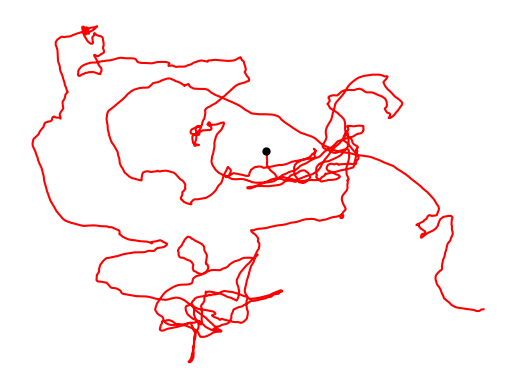

In [7]:
kB = 1.38*(10**(-23))                           #Boltzmann constant [J/K] 
T = 300                                         #Temperature [K]
eta = 0.001                                     #Fluid Viscosity [N s/m^2]
R = 1 *10**(-6)                                 #Radius of the particle [m]
DT = (kB*T)/(6*math.pi*eta*R)                   #Translational Diffusion Coefficient [m^2/s]
DR = (kB*T)/(8*math.pi*eta*R**(3))              #Rotational Diffusion Coefficient [rad^2/s]
omega = -3.14                                       #angular velocity [rad/sec]
#Specifying the values of omega as +3.14 and -3.14 will yield figures 1-(g) and (h)
v = 31*10**(-6)                                  #speed [m/s] 
tau_p = 1                                        # momentum relaxation time

t0 = -100
tf = 100
dt = 0.01
t = np.arange(t0,tf,dt)
n = int((tf-t0)/dt)

vx0 = 0
vy0 = 0
x0 = 0
y0 = 0

vx = []
vy = []
x = []
y = []

for i in range(n):
        temp_vx = vx0 - (vx0 * dt + math.sqrt(2 * DT * dt)*np.random.randn()) / tau_p
        temp_vy = vy0 - (vy0 * dt + math.sqrt(2 * DT * dt)*np.random.randn()) / tau_p
        temp_x = x0 + vx0 * dt
        temp_y = y0 + vy0 * dt
    
        
        x.append(temp_x)
        y.append(temp_y)
        vx.append(temp_vx)
        vy.append(temp_vy)
    
        vx0 = temp_vx
        vy0 = temp_vy
        x0 = temp_x
        y0 = temp_y

plt.plot(x,y,'red')
plt.plot(x[len(x)-1], y[len(y)-1],'black',marker=".", markersize=10) # end point
plt.axis('off')
plt.show() 

### Chiral Particles 

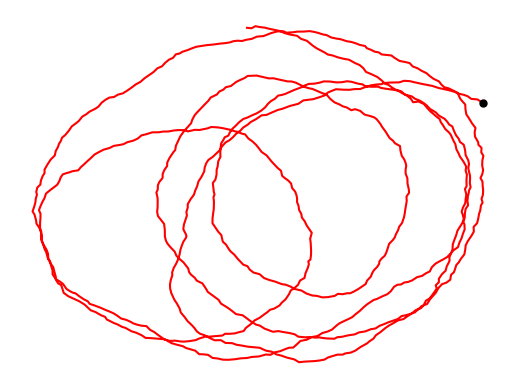

In [5]:
#Finite Difference Method
#Figure 1 (g) and (h)
#Chiral Particles - [omega = +3.14 or -3.14]

kB = 1.38*(10**(-23))                           #Boltzmann constant [J/K] 
T = 300                                         #Temperature [K]
eta = 0.001                                     #Fluid Viscosity [N s/m^2]
R = 1 *10**(-6)                                 #Radius of the particle [m]
DT = (kB*T)/(6*math.pi*eta*R)                   #Translational Diffusion Coefficient [m^2/s]
DR = (kB*T)/(8*math.pi*eta*R**(3))              #Rotational Diffusion Coefficient [rad^2/s]
omega = -3.14                                       #angular velocity [rad/sec]
#Specifying the values of omega as +3.14 and -3.14 will yield figures 1-(g) and (h)
v = 31*10**(-6)                                  #speed [m/s] 

t0 = -5
tf = 5
dt = 0.01
t = np.arange(t0,tf,dt)
n = int((tf-t0)/dt)

theta0 = 0
x0 = 0
y0 = 0

theta = []
x = []
y = []

for i in range(n):
        temp_theta = theta0 + omega *dt + math.sqrt(2 * DR *dt)*np.random.randn()
        temp_x = x0 + v*math.cos(theta0)*dt + math.sqrt(2 * DT *dt)*np.random.randn()
        temp_y = y0 + v*math.sin(theta0)*dt + math.sqrt(2 * DT *dt)*np.random.randn()
    
        theta.append(temp_theta)
        x.append(temp_x)
        y.append(temp_y)
    
        theta0 = temp_theta
        x0 = temp_x
        y0 = temp_y

plt.plot(x,y,'red')
plt.plot(x[len(x)-1], y[len(y)-1],'black',marker=".", markersize=10) # end point
# plt.xlim([-0.00001,0.00001])
# plt.ylim([-0.005, 0.005])
plt.axis('off')
plt.show()   


